# Fashion MNIST Classification
This notebook trains a simple neural network on the Fashion MNIST dataset using TensorFlow/Keras.

In [2]:
# If you are in Google Colab, you can uncomment the line below if needed:
# %tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random


## Load and explore the Fashion MNIST dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)
print("First training label:", train_labels[0])

# Let's look at one pixel value
print("A single pixel value at [0,23,23] is:", train_images[0,23,23])

# Let's have a look at the first 10 training labels
print("First 10 training labels:", train_labels[:10])

Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)
First training label: 9
A single pixel value at [0,23,23] is: 194
First 10 training labels: [9 0 0 3 0 2 7 2 5 5]


## Class names

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Class names:", class_names)

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Visualize an example image

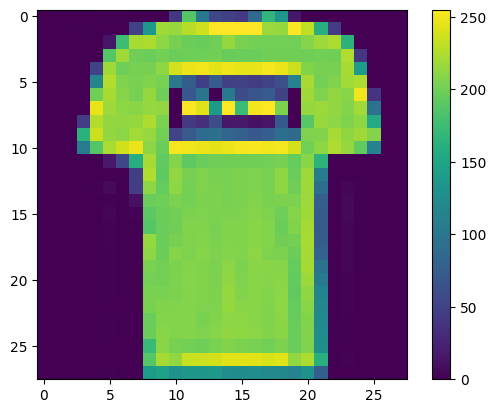

In [5]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

## Normalize the images
Scaling the pixel values between 0 and 1 helps the neural network train more efficiently.

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build the model
We'll use a simple feed-forward architecture:
- A `Flatten` layer to transform the 2D 28x28 images into a 1D array.
- A hidden layer with 128 neurons and ReLU activation.
- An output layer with 10 neurons (one for each clothing category) and Softmax activation.

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer
    keras.layers.Dense(128, activation='relu'),  # hidden layer
    keras.layers.Dense(10, activation='softmax') # output layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\Smyan Thota\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [8]:
history = model.fit(train_images, train_labels, epochs=10)

# If you want to see how the loss/accuracy evolves per epoch, you can
# inspect 'history.history' dictionary or use TensorBoard.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7798 - loss: 0.6379
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8616 - loss: 0.3801
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8771 - loss: 0.3364
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8870 - loss: 0.3081
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8912 - loss: 0.2958
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8958 - loss: 0.2810
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9043 - loss: 0.2600
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9096 - loss: 0.2477
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9090 - loss: 0.2448
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9115 - loss: 0.2343


## Evaluate the model on the test set

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8831 - loss: 0.3320
Test accuracy: 0.8860999941825867


## Make predictions

In [10]:
predictions = model.predict(test_images)
print("Prediction for first test image (raw probabilities):", predictions[0])
print("Predicted class:", np.argmax(predictions[0]))
print("Actual label:", test_labels[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Prediction for first test image (raw probabilities): [8.3684449e-07 9.7344366e-10 7.3096134e-09 9.9128782e-11 4.9749880e-09
 1.7574269e-03 8.9566932e-09 4.2375424e-03 1.3475712e-07 9.9400419e-01]
Predicted class: 9
Actual label: 9


## Visualization functions for predictions

In [11]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Expected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    show_image(image, class_names[correct_label], predicted_class)
   

def get_number():
    while True:
        num = input("Pick a number (0-1000): ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
        print("Try again...")


## Pick an image from the test set and see the model's prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


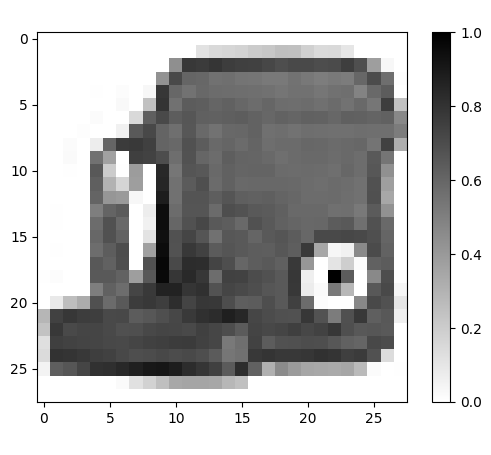

Label for image # 856 is 8
Class name for image # 856 is Bag


In [12]:
num = random.randint(1, 1000)
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
print("Label for image #", num, "is", test_labels[num])
print("Class name for image #", num, "is", class_names[test_labels[num]])
